# Import the Python Add-ons 

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Create a variable called columns_names which will be a list of the column names

In [64]:
columns_names = ['user_id','item_id','rating','timestamp']

# Read the dataset as a pandas dataframe and assign column_names as the column names 

In [65]:
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [66]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


# Show the movie titles 

In [67]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [68]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merge the two dataframes 

In [69]:
df = pd.merge(df,movie_titles,on='item_id')

In [70]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Create ratings dataframe with average ratings and number of ratings 

In [71]:
ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)

In [72]:
ratings.head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [73]:
ratings_counts = df.groupby('title')['rating'].count().sort_values(ascending=False)

In [74]:
ratings_counts.head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [75]:
complete_ratings = pd.DataFrame(data = df.groupby('title')['rating'].mean())

In [76]:
complete_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [77]:
complete_ratings['# of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [78]:
complete_ratings.head()

,rating,# of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# Visualizations

C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


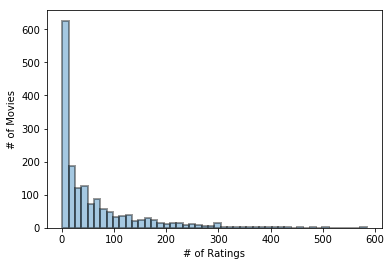

In [79]:
ax = sns.distplot(complete_ratings['# of ratings'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(xlabel='# of Ratings', ylabel='# of Movies')
plt.show()

C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


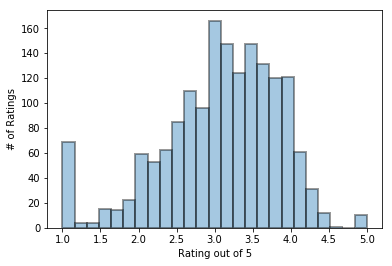

In [80]:
ax2 = sns.distplot(complete_ratings['rating'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set(xlabel='Rating out of 5', ylabel='# of Ratings')
plt.show()

# Relationship between average ratings and number of ratings

C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


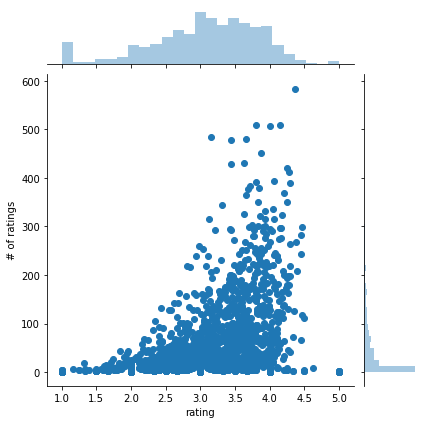

In [81]:
sns.jointplot('rating','# of ratings',complete_ratings)

# Create a matrix of User ID and Ratings per movie

In [82]:
moviematrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [83]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
complete_ratings.sort_values('# of ratings',ascending=False).head(10)

,rating,# of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [85]:
starwars_user_ratings = moviematrix['Star Wars (1977)']
liarliar_user_ratings = moviematrix['Liar Liar (1997)']

# A series of User IDs and the rating they gave starwars

In [86]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

# Find the correlation of every other movie to the user's behavior on the starwars movie

In [87]:
similar_movies_to_starwars = moviematrix.corrwith(starwars_user_ratings)
similar_movies_to_starwars.head()

C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [88]:
similar_movies_to_liarliar = moviematrix.corrwith(liarliar_user_ratings)

C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\GB341UD\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


# Clean the data 

In [89]:
corr_starwars = pd.DataFrame(similar_movies_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

# Created a dataframe where the title of the movie is the index and the correlation column says how correlated the movie's user ratings are to the user ratings of the starwars movie

In [90]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# To avoid having this problem in which certain movies are perfectly correlated to starwars, most likely due to only one person watching the movie and giving it a 5 and also rating starwars a 5, we can look at movies with a minimum number of ratings

In [91]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


# We use join instead of merge because we have "title" as the index of the dataframe

In [93]:
corr_starwars = corr_starwars.join(complete_ratings['# of ratings'])

In [94]:
corr_starwars[corr_starwars['# of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,# of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# I will do the same for Liar Liar 

In [102]:
corr_liarliar = pd.DataFrame(similar_movies_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(complete_ratings['# of ratings'])
corr_liarliar[corr_liarliar['# of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,# of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
